<a href="https://colab.research.google.com/github/Elaakarsh31/Skimlit/blob/main/Skimlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting Data

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct
!ls pubmed-rct

fatal: destination path 'pubmed-rct' already exists and is not an empty directory.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [ ]:
# check what files are in Pubmed_20k dataset
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/
!ls pubmed-rct/PubMed_200k_RCT_numbers_replaced_with_at_sign/

dev.txt  test.txt  train.txt
dev.txt  test.txt  train.zip


In [ ]:
# reading data with 20k dataset replaced by @ sign
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
# check all the filenames in the target dir
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

## Preprocess data

In [ ]:
# create function to read lines of doc
def get_lines(filename):
  with open(filename, 'r') as f:
    return f.readlines()

In [ ]:
train_lines = get_lines(filenames[1])
train_lines[:20]

['###24845963\n',
 'BACKGROUND\tThis study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( ADHF ) .\n',
 'RESULTS\tA post hoc analysis was conducted with the use of data from the Evaluation Study of Congestive Heart Failure and Pulmonary Artery Catheterization Effectiveness ( ESCAPE ) .\n',
 'RESULTS\tLiver function tests ( LFTs ) were measured at @ time points from baseline , at discharge , and up to @ months follow-up .\n',
 'RESULTS\tSurvival analyses were used to assess the association between admission Model of End-Stage Liver Disease Excluding International Normalized Ratio ( MELD-XI ) scores and patient outcome.There was a high prevalence of abnormal baseline ( admission ) LFTs ( albumin @ % , aspartate transaminase @ % , alanine transaminase @ % , and total bilirubin @ % ) .\n',
 "RESULTS\tThe percentage of patients with abnormal LFTs decreased significantly from baseline to @-months ' follow-up .\n",
 'RE

In [ ]:
len(train_lines)

35135

####Representing the data in the format:

[{  
    'line_number': 0,

    'target': 'Background',
    'text': "To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain. \n"
    'total_lines': 11
  },
  ...]

In [ ]:
def preprocess_text(filename):
  """
  Return a list of dictionaries of abstract line data
  """
  input_lines = get_lines(filename) # get all lines from filename
  abstract_lines = "" # create an empty abstract lines
  abstract_samples = [] # create an empty list of abstracts

  # loop through each line in the target file
  for line in input_lines:
      if line.startswith("###"):
        abstract_id = line
        abstract_lines = "" # reset abstract lines if this is a new id
      elif line.isspace():
        abstract_line_split = abstract_lines.splitlines()

        # Iterate through each abstract lines and count them
        for line_number, abstract_line in enumerate(abstract_line_split):
          line_data = {} # create an empty dictionary for each line
          target_text_split = abstract_line.split('\t') # split target label with line
          line_data["target"] = target_text_split[0] # target label
          line_data["text"] = target_text_split[1].lower() # target text and lower it
          line_data["line_number"] = line_number # what number at which line appears
          line_data["total_lines"] = len(abstract_line_split) - 1 # how many total lines in the abstract
          abstract_samples.append(line_data)

      else:
        abstract_lines += line

  return abstract_samples

In [ ]:
# splitting dataset

train_samples = preprocess_text(data_dir + "train.txt")
val_samples = preprocess_text(data_dir + "dev.txt") # dev is another name for validation set
test_samples = preprocess_text(data_dir + "test.txt")

In [ ]:
len(train_samples), len(val_samples), len(test_samples)

(180040, 30212, 30135)

In [ ]:
# check first abstract of training data
train_samples[:5]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

### Converting data to Dataframes

In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [ ]:
# Distribution of labels in training set
train_df.target.value_counts()

target
METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

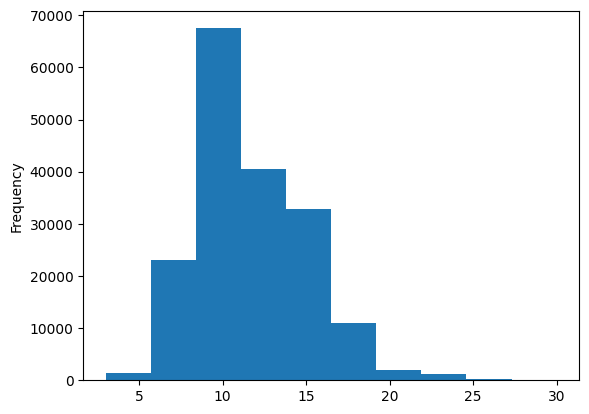

In [ ]:
train_df.total_lines.plot.hist()

### Get lists of sentences

In [ ]:
# Convert abstract text lines into lists
train_sent = train_df["text"].tolist()
val_sent = val_df["text"].tolist()
test_sent = test_df["text"].tolist()
len(train_sent), len(val_sent), len(test_sent)

(180040, 30212, 30135)

## Making Numeric labels

### One Hot Encoding

In [ ]:
# one hot encoding labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False) # we want non-sparse matrix
train_labels_one = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_labels_one = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1,1))
test_labels_one = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1,1))

train_labels_one

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

## Model 0: Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create pipeline
model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

# Fit the model
model_0.fit(X=train_sent, y=train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate model on validation dataset
model_0.score(X= val_sent, y=val_labels_encoded)

0.7218323844829869

In [ ]:
# Make predictions using our baseline model
baseline_preds = model_0.predict(val_sent)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

### Getting helper functions

In [ ]:
import urllib.request

# URL of the raw Python script on GitHub
url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"

# Download the raw Python script
urllib.request.urlretrieve(url, "helper_functions.py")

('helper_functions.py', <http.client.HTTPMessage at 0x7a8e78025660>)

In [ ]:
# Import calculate_results helper function
from helper_functions import calculate_results

In [ ]:
# Calculate baseline results
baseline_results = calculate_results(y_true=val_labels_encoded, y_pred = baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Preparing our data for sequence models

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# How long is each sentence is on average
sent_len = [len(sentence.split()) for sentence in train_sent]
avg_len = np.mean(sent_len)
avg_len

26.338269273494777

(array([4.2075e+04, 8.3771e+04, 3.6877e+04, 1.0945e+04, 3.9310e+03,
        1.4450e+03, 5.6000e+02, 2.2600e+02, 1.0100e+02, 4.5000e+01,
        2.0000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+01, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.  ,  15.75,  30.5 ,  45.25,  60.  ,  74.75,  89.5 , 104.25,
        119.  , 133.75, 148.5 , 163.25, 178.  , 192.75, 207.5 , 222.25,
        237.  , 251.75, 266.5 , 281.25, 296.  ]),
 <BarContainer object of 20 artists>)

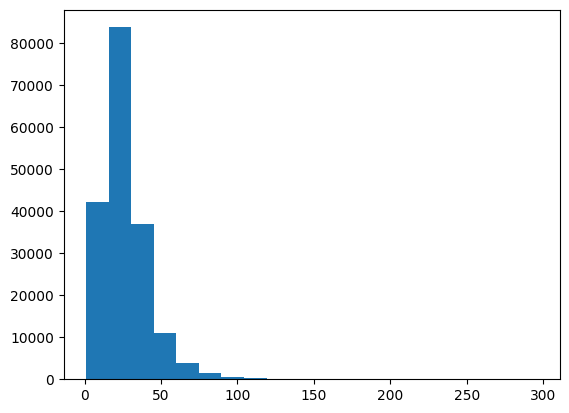

In [ ]:
# Distribution
import matplotlib.pyplot as plt
plt.hist(sent_len, bins=20)

In [ ]:
# How long a sentence length convers 95% of examples
output_len = int(np.percentile(sent_len, 95))
output_len

55

### Create text vectorizer layer

In [ ]:
# How many words in vocab: (taken from the skimlit paper)
max_tokens = 68000

In [ ]:
# Create text vectorizer
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens = max_tokens, output_sequence_length=output_len)

In [ ]:
# Adapt text vectorizer to training set
text_vectorizer.adapt(train_sent)

In [ ]:
# Test out text on random sentences
import random
target_sent = random.choice(train_sent)
print(f"Text: {target_sent}\n")
print(f"Length of text: {len(target_sent)}\n")
print(f"Vectorized Sent: {text_vectorizer(target_sent)}")

Text: in this randomized controlled trial , @ non-demented patients with pd according to uk brain bank criteria ( hoehn & yahr i-iii ) were allocated to one of two cognitive multi-component treatments ( `` neurovitalis '' , a structured training , or the unstructured training `` mentally fit '' with randomly assembled cognitive tasks , each including @ group-sessions @min over @ weeks ) or a waiting list control group ( cg ) .

Length of text: 424

Vectorized Sent: [    5    23    29   106    32 15694    12     7   868   374     6  1404
   623 17490   391 15919 15250  9681     9   379     6    88     4    51
   301  3530   377 25564     8  1678   155    16     2 12315   155 10681
  2188     7    92 32573   301  1635   122   251 56763   242   145    53
    16     8  2379  1906    35    13  1512]


In [ ]:
# How many words in our training vocabulary
rct_20k_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocab: {len(rct_20k_vocab)}")
print(f"Most common words: {rct_20k_vocab[:5]}")
print(f"Least common words: {rct_20k_vocab[-5:]}")

Number of words in vocab: 64841
Most common words: ['', '[UNK]', 'the', 'and', 'of']
Least common words: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [ ]:
# get text vectorizer config
text_vectorizer.get_config()

{'name': 'text_vectorization_1',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

### Create custom text embeddings

In [ ]:
# Create token embedding layer
token_embed = layers.Embedding(input_dim=len(rct_20k_vocab), output_dim=128, mask_zero=1, name="token_embedding")

In [ ]:
# Show embedding example
print(f"Sentence before vectorization:\n {target_sent}\n")
vectorized_sent = text_vectorizer([target_sent])
print(f"Sentence after vectorization (before embedding):\n {vectorized_sent}\n ")
embed_sent = token_embed(vectorized_sent)
print(f"Sentence after embedding: \n{embed_sent}\n")
print(f"Embedded sentence shape: \n{embed_sent.shape}\n")

Sentence before vectorization:
 in this randomized controlled trial , @ non-demented patients with pd according to uk brain bank criteria ( hoehn & yahr i-iii ) were allocated to one of two cognitive multi-component treatments ( `` neurovitalis '' , a structured training , or the unstructured training `` mentally fit '' with randomly assembled cognitive tasks , each including @ group-sessions @min over @ weeks ) or a waiting list control group ( cg ) .

Sentence after vectorization (before embedding):
 [[    5    23    29   106    32 15694    12     7   868   374     6  1404
    623 17490   391 15919 15250  9681     9   379     6    88     4    51
    301  3530   377 25564     8  1678   155    16     2 12315   155 10681
   2188     7    92 32573   301  1635   122   251 56763   242   145    53
     16     8  2379  1906    35    13  1512]]
 
Sentence after embedding: 
[[[-0.01354542  0.0227751  -0.04762983 ...  0.03974095 -0.02924503
   -0.00367179]
  [-0.00509883 -0.01261768 -0.0301813 

## Creating datasets (making sure dataset loads as fast as possible)

In [ ]:
# Turn data into Tensorflow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_sent, train_labels_one))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sent, val_labels_one))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sent, test_labels_one))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
# Take tf dataset and turn them into prefetch dataset
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

## Model 1: Conv1D model
With token embeddings

In [ ]:
num_classes = len(label_encoder.classes_)
num_classes

5

In [ ]:
# Create 1D conv model
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs)
token_embeds = token_embed(text_vectors)
x = layers.Conv1D(64, kernel_size=5, padding = 'same', activation="relu")(token_embeds)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector for conv layer
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile
model_1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 55)                0         
 Vectorization)                                                  
                                                                 
 token_embedding (Embedding  (None, 55, 128)           8299648   
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d_1  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                           

In [ ]:
# Fit the model
his_model_1 = model_1.fit(train_dataset,
                          steps_per_epoch=int(0.1*len(train_dataset)),
                          epochs=5,
                          validation_data = val_dataset,
                          validation_steps = int(0.1*len(val_dataset))) # only validate on 10% of batches

Epoch 1/5
562/562 [==============================] - 25s 41ms/step - loss: 0.9086 - accuracy: 0.6403 - val_loss: 0.6811 - val_accuracy: 0.7400
Epoch 2/5
562/562 [==============================] - 7s 12ms/step - loss: 0.6567 - accuracy: 0.7581 - val_loss: 0.6268 - val_accuracy: 0.7749
Epoch 3/5
562/562 [==============================] - 5s 9ms/step - loss: 0.6174 - accuracy: 0.7730 - val_loss: 0.5945 - val_accuracy: 0.7849
Epoch 4/5
562/562 [==============================] - 4s 6ms/step - loss: 0.5888 - accuracy: 0.7897 - val_loss: 0.5757 - val_accuracy: 0.7889
Epoch 5/5
562/562 [==============================] - 4s 7ms/step - loss: 0.5902 - accuracy: 0.7917 - val_loss: 0.5617 - val_accuracy: 0.7969


In [ ]:
model_1.evaluate(val_dataset)

945/945 [==============================] - 4s 4ms/step - loss: 0.5607 - accuracy: 0.8017


[0.5607265830039978, 0.8017013072967529]

In [ ]:
model_1_pred_probs = model_1.predict(val_dataset)
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

945/945 [==============================] - 2s 2ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
# Calculate model_1 results
model_1_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 80.17013107374554,
 'precision': 0.801502766102189,
 'recall': 0.8017013107374553,
 'f1': 0.7984333749105011}

## Model 2
Feature extraction with pretrained token embeddings
* Using USE encoder
* the output of USE encoder is always 512 no matter the length of input text

In [ ]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False, # whether to train the paramteres of USE
                                        name="universal_sentence_encoder"
                                        )

In [ ]:
# test out the pretrained embedding on a random sentence
random_training_sentence = random.choice(train_sent)
print(f"Random training sentence:\n{random_training_sentence}\n")
use_embedded_sentence = tf_hub_embedding_layer([random_training_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence[0][:30]} (truncated output)...\n")
print(f"Length of sentence embedding:\n{len(use_embedded_sentence[0])}")

Random training sentence:
determine changes in cognition and post-traumatic stress disorder ( ptsd ) symptoms in subjects with traumatic brain injury ( tbi ) exposed to @ atmospheres absolute ( atm abs ) breathing @ % oxygen vs. sham ( @ atm-abs air ) .

Sentence after embedding:
[ 0.0165055   0.06383165 -0.03571001  0.02956229  0.02455786 -0.02908579
  0.05488074 -0.0103911  -0.01108159  0.06867029  0.07473172  0.0661038
  0.04548708  0.01429226  0.04234157 -0.07466567 -0.07484391  0.04800371
 -0.01728609 -0.05268263  0.0632205  -0.00823597  0.00167989  0.02092969
 -0.03986569  0.0295147   0.00651878 -0.03511278 -0.04539127 -0.06840375] (truncated output)...

Length of sentence embedding:
512


### Buildin and fitting NLP feature extraction model

In [ ]:
# Define feature extraction model using TF hub layer
inputs = layers.Input(shape=[], dtype=tf.string) # tf hub expects empty list
pretrained_embedding = tf_hub_embedding_layer(inputs) # tokenize and create embedding (512 long vector)
x = layers.Dense(128, activation="relu")(pretrained_embedding)
output = layers.Dense(5, activation="softmax")(x)

model_2 = tf.keras.Model(inputs=inputs, outputs=output, name="model_2_USE")

# Compile model
model_2.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=["accuracy"])

In [ ]:
model_2.summary()

Model: "model_2_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder  (None, 512)               256797824 
  (KerasLayer)                                                   
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 dense_7 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256864133 (979.86 MB)
Trainable params: 66309 (259.02 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Fit model
his_model_2 = model_2.fit(train_dataset,
                          steps_per_epoch=int(0.1*len(train_dataset)),
                          epochs=5,
                          validation_data = val_dataset,
                          validation_steps = int(0.1*len(val_dataset)))

Epoch 1/5
562/562 [==============================] - 10s 13ms/step - loss: 0.9193 - accuracy: 0.6490 - val_loss: 0.7984 - val_accuracy: 0.6908
Epoch 2/5
562/562 [==============================] - 8s 14ms/step - loss: 0.7691 - accuracy: 0.7023 - val_loss: 0.7572 - val_accuracy: 0.7045
Epoch 3/5
562/562 [==============================] - 7s 12ms/step - loss: 0.7534 - accuracy: 0.7110 - val_loss: 0.7437 - val_accuracy: 0.7098
Epoch 4/5
562/562 [==============================] - 8s 14ms/step - loss: 0.7206 - accuracy: 0.7221 - val_loss: 0.7145 - val_accuracy: 0.7261
Epoch 5/5
562/562 [==============================] - 9s 15ms/step - loss: 0.7286 - accuracy: 0.7185 - val_loss: 0.6942 - val_accuracy: 0.7334


In [ ]:
# evaluate
model_2.evaluate(val_dataset)

945/945 [==============================] - 11s 11ms/step - loss: 0.6994 - accuracy: 0.7334


[0.6994449496269226, 0.7334172129631042]

In [ ]:
model_2_pred_probs = model_2.predict(val_dataset)
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

945/945 [==============================] - 9s 9ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 2])>

In [ ]:
model_2_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 73.34171852244141,
 'precision': 0.7302459297615401,
 'recall': 0.7334171852244141,
 'f1': 0.7277296260854595}

##Character level Dataset

### Create character level tokenization

In [ ]:
# make function to split
def split_chars(text):
  return " ".join(list(text))

In [ ]:
# Text splitting into characters
split_chars(random_training_sentence)

'd e t e r m i n e   c h a n g e s   i n   c o g n i t i o n   a n d   p o s t - t r a u m a t i c   s t r e s s   d i s o r d e r   (   p t s d   )   s y m p t o m s   i n   s u b j e c t s   w i t h   t r a u m a t i c   b r a i n   i n j u r y   (   t b i   )   e x p o s e d   t o   @   a t m o s p h e r e s   a b s o l u t e   (   a t m   a b s   )   b r e a t h i n g   @   %   o x y g e n   v s .   s h a m   (   @   a t m - a b s   a i r   )   .'

In [ ]:
# Split sequence level data into character level splits
train_chars = [split_chars(sent) for sent in train_sent]
val_chars = [split_chars(sent) for sent in val_sent]
test_chars = [split_chars(sent) for sent in test_sent]
train_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [ ]:
# Average character length
char_len = [len(sent) for sent in train_sent]
mean_char_len = np.mean(char_len)
mean_char_len

149.3662574983337

(array([1.41175e+05, 3.71110e+04, 1.60000e+03, 1.27000e+02, 2.10000e+01,
        5.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 1.98857143e+02, 3.96714286e+02, 5.94571429e+02,
        7.92428571e+02, 9.90285714e+02, 1.18814286e+03, 1.38600000e+03]),
 <BarContainer object of 7 artists>)

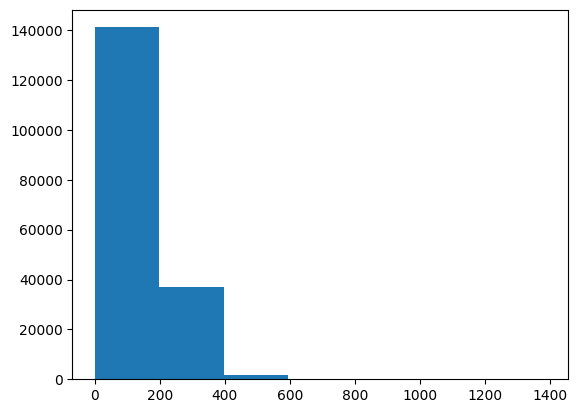

In [ ]:
# Check distribution of our character sequences
plt.hist(char_len, bins=7)

In [ ]:
# Find what character covers 95% of sequences
output_char_len = int(np.percentile(char_len, 95))
output_char_len

290

In [ ]:
# get all keyboard characters
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Create char-level token vectorizer
NUM_CHAR_TOKENS = len(alphabet) + 2 # add 2 for space and OOV token
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                 output_sequence_length=output_char_len,
                                # standardize = 'lower_and_strip_punctuation',
                                 name="char_vectorizer")

In [ ]:
# Adapt character vectorizer
char_vectorizer.adapt(train_chars)

In [ ]:
# Check character vocab characteristics
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [ ]:
# Test out character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
f o r   s u s t a i n a b i l i t y   ,   c o m m u n i t y   d i s a s t e r   r e d u c t i o n   p r o g r a m s   m u s t   b e   i n t e g r a t e d   i n t o   r o u t i n e   p u b l i c   h e a l t h   s e r v i c e   d e l i v e r y   .

Length of chars: 107

Vectorized chars:
[[17  7  8  9 16  9  3  5  4  6  5 22  4 12  4  3 19 11  7 15 15 16  6  4
   3 19 10  4  9  5  9  3  2  8  8  2 10 16 11  3  4  7  6 14  8  7 18  8
   5 15  9 15 16  9  3 22  2  4  6  3  2 18  8  5  3  2 10  4  6  3  7  8
   7 16  3  4  6  2 14 16 22 12  4 11 13  2  5 12  3 13  9  2  8 21  4 11
   2 10  2 12  4 21  2  8 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0

### Creating Character Embeddings

In [ ]:
char_embed = layers.Embedding(input_dim=len(char_vocab), # number of different character
                              output_dim=25, # output size as per the paper
                              mask_zero=True,
                              name="char_embed")

In [ ]:
# Test char embed
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
f o r   s u s t a i n a b i l i t y   ,   c o m m u n i t y   d i s a s t e r   r e d u c t i o n   p r o g r a m s   m u s t   b e   i n t e g r a t e d   i n t o   r o u t i n e   p u b l i c   h e a l t h   s e r v i c e   d e l i v e r y   .

Embedded chars (after vectorization and embedding):
[[[-0.00859178 -0.04648217 -0.04623628 ...  0.01348424  0.04427123
   -0.04143571]
  [ 0.00671355  0.01614702 -0.04590368 ...  0.01452852  0.03344161
   -0.04731443]
  [-0.04360895 -0.00402421 -0.0397419  ...  0.02169729 -0.03854318
   -0.01392812]
  ...
  [ 0.03346414  0.01605792 -0.0487783  ... -0.00452427  0.00801162
   -0.02885683]
  [ 0.03346414  0.01605792 -0.0487783  ... -0.00452427  0.00801162
   -0.02885683]
  [ 0.03346414  0.01605792 -0.0487783  ... -0.00452427  0.00801162
   -0.02885683]]]

Character embedding shape: (1, 290, 25)


### Creating tf dataset

In [ ]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

## Model 3: Conv1D on char embeddings

In [ ]:
# Make conv1d
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
# x = layers.GlobalAveragePooling1D()(x) can change to MaxPool (boost in accuracy)
x = layers.GlobalMaxPool1D()(x)
output = layers.Dense(num_classes, activation="softmax")(x)

model_3 = tf.keras.Model(inputs = inputs, outputs=output, name="model_3_conv1d_char")

# compile
model_3.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=["accuracy"])

In [ ]:
model_3.summary()

Model: "model_3_conv1d_char"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVecto  (None, 290)               0         
 rization)                                                       
                                                                 
 char_embed (Embedding)      (None, 290, 25)           700       
                                                                 
 conv1d_2 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_8 (Dense)             (None, 5)         

In [ ]:
model_3_his = model_3.fit(train_char_dataset,
                          steps_per_epoch=int(0.1*len(train_char_dataset)),
                          epochs=5,
                          validation_data = val_char_dataset,
                          validation_steps = int(0.1*len(val_char_dataset)))

Epoch 1/5
562/562 [==============================] - 5s 6ms/step - loss: 1.2591 - accuracy: 0.4870 - val_loss: 1.0574 - val_accuracy: 0.5731
Epoch 2/5
562/562 [==============================] - 4s 7ms/step - loss: 1.0196 - accuracy: 0.5879 - val_loss: 0.9532 - val_accuracy: 0.6263
Epoch 3/5
562/562 [==============================] - 3s 6ms/step - loss: 0.9406 - accuracy: 0.6278 - val_loss: 0.8849 - val_accuracy: 0.6503
Epoch 4/5
562/562 [==============================] - 3s 6ms/step - loss: 0.8837 - accuracy: 0.6537 - val_loss: 0.8564 - val_accuracy: 0.6533
Epoch 5/5
562/562 [==============================] - 4s 7ms/step - loss: 0.8688 - accuracy: 0.6622 - val_loss: 0.8336 - val_accuracy: 0.6676


In [ ]:
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

945/945 [==============================] - 3s 3ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 0, 3, ..., 4, 4, 1])>

In [ ]:
model_3_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 66.94690851317358,
 'precision': 0.676366676252256,
 'recall': 0.6694690851317358,
 'f1': 0.6658681129397254}

## Creating token and Character dataset with tf.data

In [ ]:
def create_dataset(sent, chars, label):
  data = tf.data.Dataset.from_tensor_slices((sent, chars)) # make data
  labels = tf.data.Dataset.from_tensor_slices(label)# make labels
  dataset = tf.data.Dataset.zip((data, labels)) # combine data and labels

  # Prefetch and batch train data
  return dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Create Train, Val and Test Data
train_char_token_dataset = create_dataset(train_sent, train_chars, train_labels_one) # Train
val_char_token_dataset = create_dataset(val_sent, val_chars, val_labels_one) # Val
test_char_token_dataset = create_dataset(test_sent, test_chars, test_labels_one) # Test

train_char_token_dataset, val_char_token_dataset, test_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

## Model 4: Pretrained Embeds + char embeds

In [ ]:
# 1. Setup token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, # 300 is used in paper
                            activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs = token_inputs, outputs= token_output)

# 2. Setup char model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs, outputs=char_bi_lstm)

# 3. Concatenate token and char inputs
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output, char_model.output])

# 4. Create output layers
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128, activation="relu")(combined_dropout) # paper used bi-lstm
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

# 5. Contruct model
model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input], outputs=output_layer,
                         name="model_4_token_and_char")

In [ ]:
model_4.summary()

Model: "model_4_token_and_char"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_input[0][0]']          
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978   ['token_i

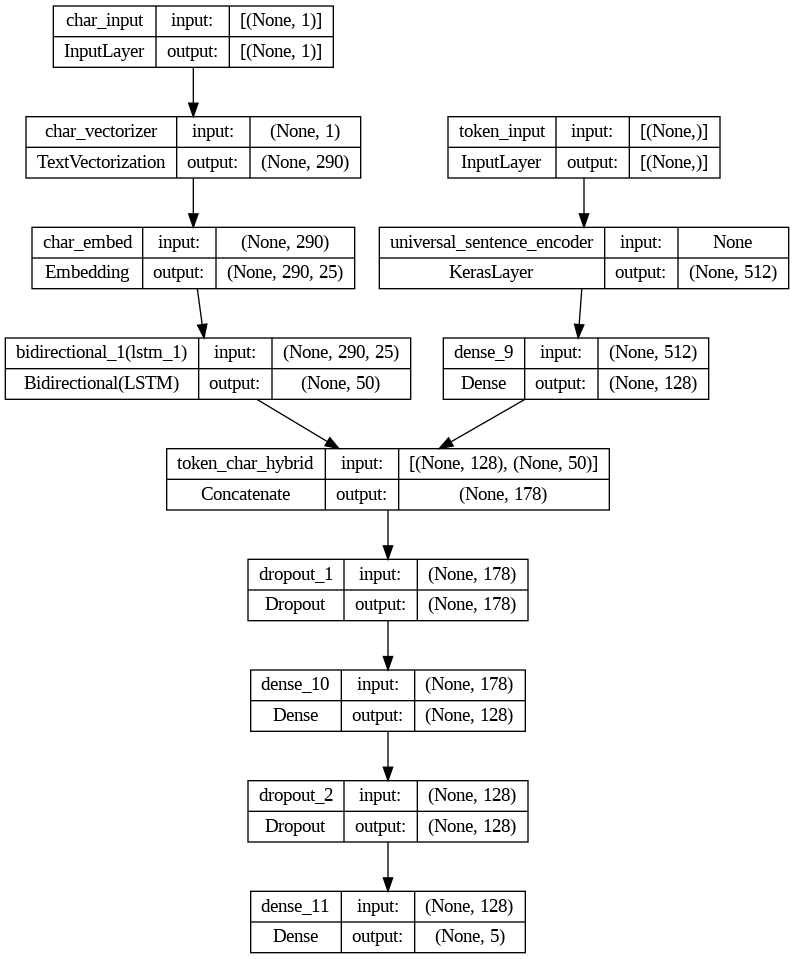

In [ ]:
# Plot hybrid token and char model
from keras.utils import plot_model
plot_model(model_4, show_shapes=True)

In [ ]:
# Compile token char model
model_4.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Fit model

In [ ]:
his_model_4 = model_4.fit(train_char_token_dataset,
                          steps_per_epoch=int(0.1*len(train_char_token_dataset)),
                          epochs=5,
                          validation_data = val_char_token_dataset,
                          validation_steps = int(0.1*len(val_char_token_dataset)))

Epoch 1/5
562/562 [==============================] - 44s 58ms/step - loss: 0.9827 - accuracy: 0.6112 - val_loss: 0.7743 - val_accuracy: 0.7001
Epoch 2/5
562/562 [==============================] - 27s 47ms/step - loss: 0.7977 - accuracy: 0.6919 - val_loss: 0.7143 - val_accuracy: 0.7287
Epoch 3/5
562/562 [==============================] - 25s 44ms/step - loss: 0.7726 - accuracy: 0.7049 - val_loss: 0.6894 - val_accuracy: 0.7434
Epoch 4/5
562/562 [==============================] - 29s 51ms/step - loss: 0.7416 - accuracy: 0.7214 - val_loss: 0.6674 - val_accuracy: 0.7503
Epoch 5/5
562/562 [==============================] - 26s 47ms/step - loss: 0.7493 - accuracy: 0.7191 - val_loss: 0.6568 - val_accuracy: 0.7530


In [ ]:
# Make predictions
model_4_pred_probs = model_4.predict(test_char_token_dataset)
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

942/942 [==============================] - 21s 20ms/step


<tf.Tensor: shape=(30135,), dtype=int64, numpy=array([0, 2, 2, ..., 4, 4, 4])>

In [ ]:
model_4_results = calculate_results(y_true=test_labels_encoded,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 74.06669985067198,
 'precision': 0.7365557380838088,
 'recall': 0.7406669985067198,
 'f1': 0.7348039528730684}

## Creating Dataset with positional Embeddings

### Encoding Line features

In [ ]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [ ]:
# How many different line numbers are there?
train_df["line_number"].value_counts()

line_number
0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

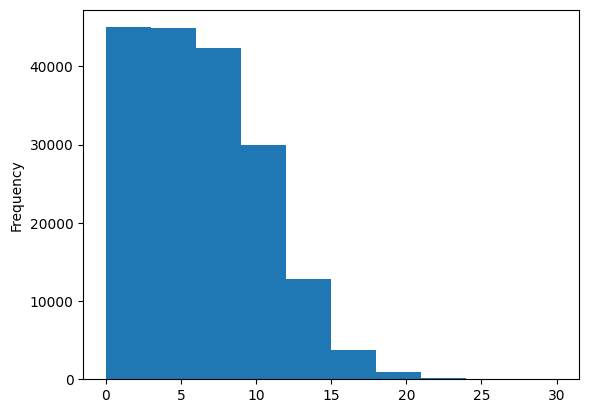

In [ ]:
# Check the distribution of 'line_number' column
train_df.line_number.plot.hist()

In [ ]:
# Use tensorflow to create one hot encode
train_line_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)
train_line_one_hot[:14], train_line_one_hot.shape

(<tf.Tensor: shape=(14, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.

In [ ]:
# How many different lines
train_df["total_lines"].value_counts()

total_lines
11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

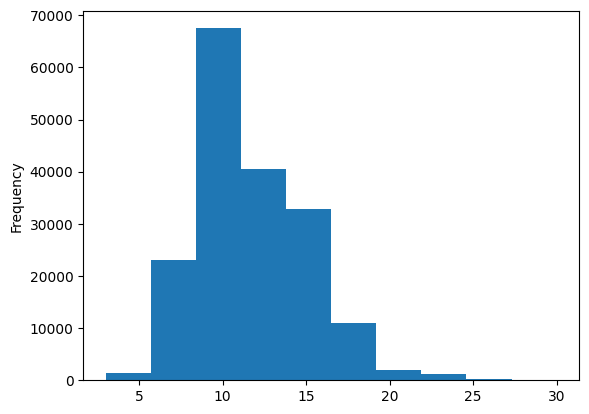

In [ ]:
# Check distribution
train_df.total_lines.plot.hist()

In [ ]:
# check coverage of total_lines
np.percentile(train_df.total_lines, 98)

20.0

In [ ]:
# use tensorflow encoding
train_total_lines_oh = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_oh = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_oh = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

train_total_lines_oh[:10], train_total_lines_oh.shape

(<tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0

### Creating Dataset with tf.data

In [ ]:
# create func
def create_tri_data(train_line_one_hot,train_total_lines_oh, train_sent, train_chars):
  train_token_pos_data = tf.data.Dataset.from_tensor_slices((train_line_one_hot,
                                                           train_total_lines_oh,
                                                           train_sent,
                                                           train_chars))
  train_token_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one)
  train_char_token_pos_dataset = tf.data.Dataset.zip((train_token_pos_data, train_token_pos_labels))
  return train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_char_token_pos_dataset = create_tri_data(train_line_one_hot,train_total_lines_oh, train_sent, train_chars) # Train
val_char_token_pos_dataset = create_tri_data(val_line_one_hot,val_total_lines_oh, val_sent, val_chars) # Val
test_char_token_pos_dataset = create_tri_data(test_line_one_hot,test_total_lines_oh, test_sent, test_chars) # Test

train_char_token_pos_dataset, val_char_token_pos_dataset, test_char_token_pos_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

## Model 5: Tribid Embedding model

In [ ]:
# 1. Setup token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, # 300 is used in paper
                            activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs = token_inputs, outputs= token_output)

# 2. Setup char model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs, outputs=char_bi_lstm)

# 3. Line numbers model
line_inputs = layers.Input(shape=(15,), dtype=tf.float32, name="line_number_input")
line_dense = layers.Dense(32, activation="relu")(line_inputs)
line_number_model = tf.keras.Model(inputs=line_inputs, outputs=line_dense)

# 4. Total lines model
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.float32, name="total_lines_input")
total_lines_dense = layers.Dense(32, activation="relu")(total_lines_inputs)
total_lines_model = tf.keras.Model(inputs=total_lines_inputs, outputs=total_lines_dense)

# 5. Concatenate token and char inputs
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output, char_model.output])

z = layers.Dense(256, activation="relu")(token_char_concat) # this layer is optional
z = layers.Dropout(0.5)(z)

# 6. Concatenate positional embeds + token & char embeds (tribid embeds)
tribid_embeds = layers.Concatenate(name="char_token_positional_embeds")([line_number_model.output,
                                                                         total_lines_model.output,
                                                                         z])
# 7. Create output layer
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(tribid_embeds)

# 8. Put together the model
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_lines_model.input,
                                 token_model.input,
                                 char_model.input],
                                 outputs=output_layer, name="tribid_embedding_model")

In [ ]:
model_5.summary()

Model: "tribid_embedding_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_input[0][0]']          
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978   ['token_i

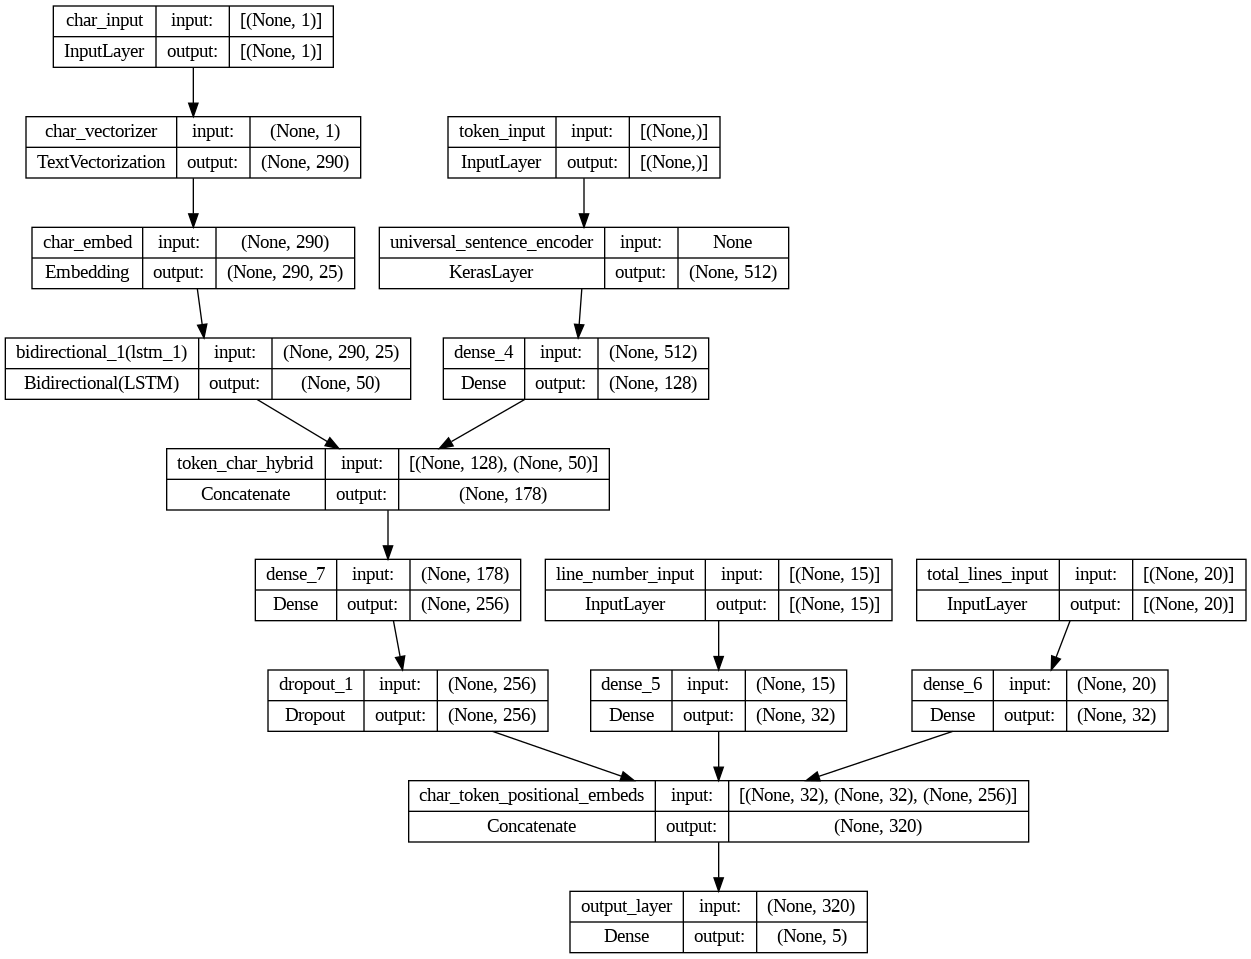

In [ ]:
# Plot tribid token and char model
from keras.utils import plot_model
plot_model(model_5, show_shapes=True)

In [ ]:
# Compile model
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), # preventing over-fitting
                optimizer="adam",
                metrics= ["accuracy"])

#### Fit model

In [ ]:
# Fit the model
model_5_his = model_5.fit(train_char_token_pos_dataset,
                          steps_per_epoch=int(0.1*len(train_char_token_pos_dataset)),
                          epochs=5,
                          validation_data = val_char_token_pos_dataset,
                          validation_steps = int(0.1*len(val_char_token_pos_dataset)))

Epoch 1/5
562/562 [==============================] - 44s 52ms/step - loss: 1.0951 - accuracy: 0.7246 - val_loss: 2.0421 - val_accuracy: 0.3002
Epoch 2/5
562/562 [==============================] - 30s 53ms/step - loss: 0.9695 - accuracy: 0.8137 - val_loss: 2.0706 - val_accuracy: 0.3039
Epoch 3/5
562/562 [==============================] - 45s 79ms/step - loss: 0.9523 - accuracy: 0.8210 - val_loss: 2.1254 - val_accuracy: 0.2995
Epoch 4/5
562/562 [==============================] - 36s 64ms/step - loss: 0.9398 - accuracy: 0.8349 - val_loss: 2.1269 - val_accuracy: 0.3059
Epoch 5/5
562/562 [==============================] - 25s 45ms/step - loss: 0.9370 - accuracy: 0.8370 - val_loss: 2.1174 - val_accuracy: 0.3042


In [ ]:
# Results
model_5_pred_probs = model_5.predict(test_char_token_pos_dataset)
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)

model_5_results = calculate_results(y_true=test_labels_encoded,
                                    y_pred=model_5_preds)
model_5_results

942/942 [==============================] - 21s 19ms/step


{'accuracy': 83.68010618881699,
 'precision': 0.8387678949531783,
 'recall': 0.8368010618881699,
 'f1': 0.8334054763402714}

## Compare Models

In [ ]:
# combine model results into dataframe
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "custom_token_embed_conv1d": model_1_results,
                                  "pretrained_token_embed": model_2_results,
                                  "custom_char_embed_conv1d": model_3_results,
                                  "hybrid_char_token_embed": model_4_results,
                                  "tribrid_pos_char_token_embed": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,72.183238,0.718647,0.721832,0.698925
custom_token_embed_conv1d,80.170131,0.801503,0.801701,0.798433
pretrained_token_embed,73.341719,0.730246,0.733417,0.727730
custom_char_embed_conv1d,66.946909,0.676367,0.669469,0.665868
hybrid_char_token_embed,74.066700,0.736556,0.740667,0.734804
tribrid_pos_char_token_embed,83.680106,0.838768,0.836801,0.833405


In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

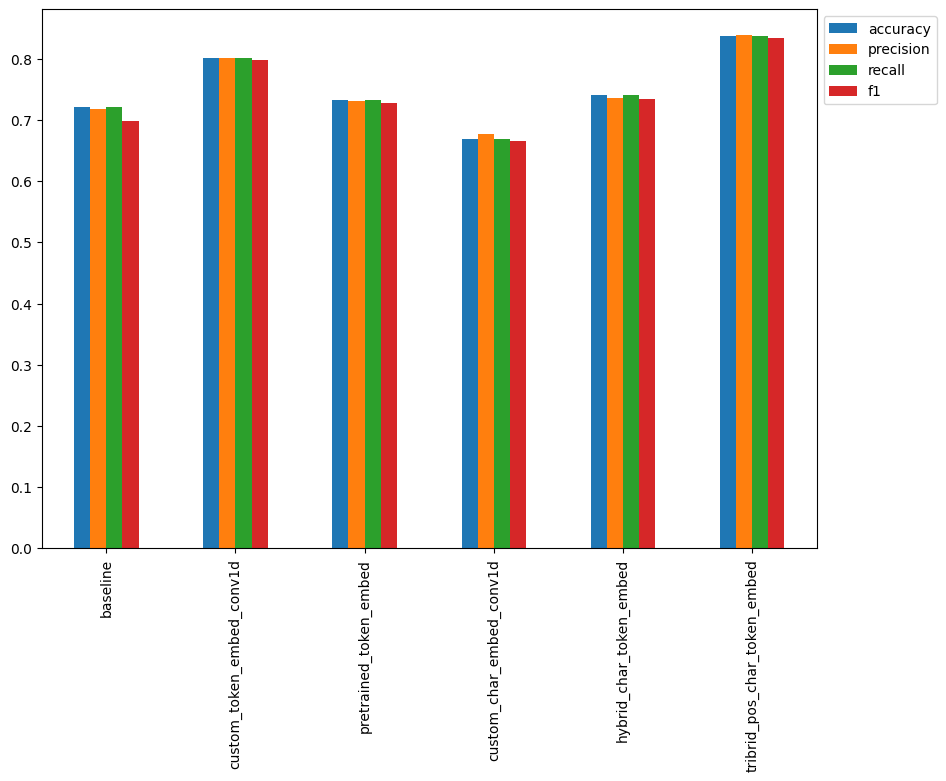

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

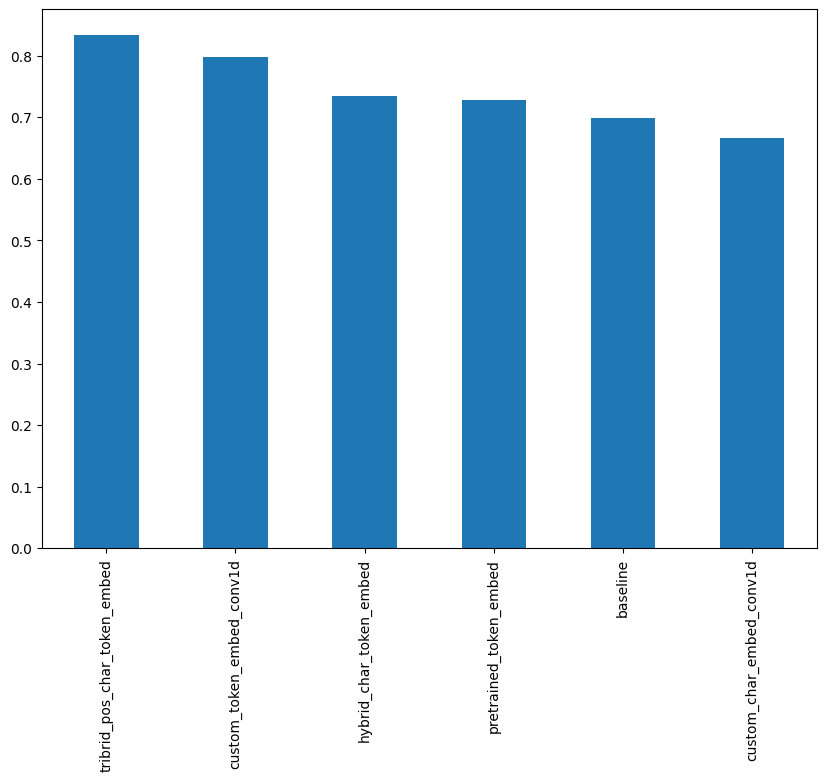

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));